In [5]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras as keras
from keras.models import load_model
from keras.preprocessing import image

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

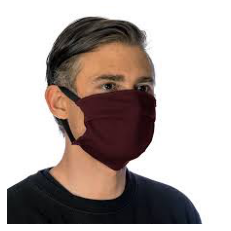

[1]
[[1.344881e-06 9.999839e-01]]


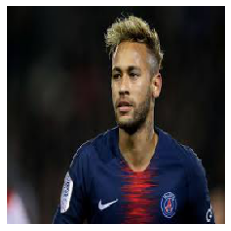

[0]
[[1.000000e+00 5.975668e-13]]


In [14]:
MODEL_PATH = '/home/leviathan/ml/mask_recognition/mask_recognition_model/'
MASKED_IMG_PATH = '/home/leviathan/ml/masked_face.jpg'
FACE_IMG_PATH = '/home/leviathan/ml/face.jpg'

IMG_HEIGHT = 224
IMG_WIDTH = 224

def load_image(img_path, show=False):
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

trained_model = tf.keras.models.load_model(MODEL_PATH)
trained_model.summary()

masked_image = load_image(MASKED_IMG_PATH, True)
classes = trained_model.predict(masked_image)
classes_label = classes.argmax(axis=-1)
print(classes_label)
print(classes)

face_image = load_image(FACE_IMG_PATH, True)
classes = trained_model.predict(face_image)
classes_label = classes.argmax(axis=-1)
print(classes_label)
print(classes)